In [1]:
library(reticulate)
library(ggplot2)
library(Seurat)
library(SeuratData)
library(SeuratDisk)
library(SeuratWrappers)
library(sceasy)
library(patchwork)
library(Matrix)
library(nichenetr)
library(tidyverse)
library(anndata)
#loompy <- reticulate::import('loompy')
use_condaenv('R4.1')
use_virtualenv("/home/junhokang/.conda/envs/r-reticulate")
#use_python("/home/junhokang/.conda/envs/jp24/bin/python")

Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom

Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (is.na(desc)) {:
“the condition has length > 1 and only the first element will be used

## Converting & Loading Seurat Object

In [2]:
# Converting h5ad to seurat object
Convert("./write/MOG15.v03.MOG3_dzonly_slim_211208.h5ad", dest = "h5seurat", overwrite = TRUE)

Warning message:
“Unknown file type: h5ad”
Warning message:
“'assay' not set, setting to 'RNA'”
Creating h5Seurat file for version 3.1.5.9900

Adding X as scale.data

Adding raw/X as data

Adding raw/X as counts

Adding meta.features from raw/var

Merging EnsemblID from scaled feature-level metadata

Merging GeneName from scaled feature-level metadata

Merging dispersions from scaled feature-level metadata

Merging dispersions_norm from scaled feature-level metadata

Merging feature_types from scaled feature-level metadata

Merging gene_ids from scaled feature-level metadata

Adding mean from scaled feature-level metadata

Merging means from scaled feature-level metadata

Adding std from scaled feature-level metadata

Adding X_pca as cell embeddings for pca

Adding X_umap as cell embeddings for umap

Adding X_umap_original as cell embeddings for umap_original

Adding PCs as feature loadings fpr pca

Adding miscellaneous information for pca

Adding standard deviations for pca

Adding mi

In [3]:
adata <- LoadH5Seurat("./write/MOG15.v03.MOG3_dzonly_slim_211208.h5seurat")

Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding scale.data for RNA

Adding feature-level metadata for RNA

Adding reduction pca

Adding cell embeddings for pca

Adding feature loadings for pca

Adding miscellaneous information for pca

Adding reduction umap

Adding cell embeddings for umap

Adding miscellaneous information for umap

Adding reduction umap_original

Adding cell embeddings for umap_original

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_original_ to umaporiginal_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to umaporiginal_”
Adding miscellaneous information for umap_original

Adding command information

Adding cell-level metadata

Adding miscellaneous information

Adding tool-specific results



In [4]:
adata

An object of class Seurat 
36601 features across 118211 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 3 dimensional reductions calculated: pca, umap, umap_original

In [5]:
adata@meta.data %>% head()

,Sample,DiseaseCode,Tissue,anno_final
,<fct>,<fct>,<fct>,<fct>
CYG_CSF_AAACCCACAAGACCGA-1,CYG_CSF,MOG,CSF,Myl_MonoCD14
CYG_CSF_AAACCCACACGGCACT-1,CYG_CSF,MOG,CSF,T_REG
CYG_CSF_AAACCCATCAGAATAG-1,CYG_CSF,MOG,CSF,T_CD4_naive
CYG_CSF_AAACGAAAGGTAAAGG-1,CYG_CSF,MOG,CSF,T_CD8_memory
CYG_CSF_AAACGAATCACTCCGT-1,CYG_CSF,MOG,CSF,T_CD8_memory
CYG_CSF_AAACGAATCCGTTGGG-1,CYG_CSF,MOG,CSF,Myl_Microglia


In [6]:
adata@meta.data$anno_final %>% table()

.
      B_memory        B_naive       B_plasma Hp_Erythrocyte         Hp_Mgk 
          2436           4107            262            327            261 
           ILC    ILC_NK_CD16    ILC_NK_XCL1    Myl_ACY3_DC       Myl_ASDC 
           105          11022           1380            195            187 
       Myl_DC1        Myl_DC2   Myl_LAMP3_DC       Myl_Mast  Myl_Microglia 
           122           2445             44            268           1680 
  Myl_MonoCD14   Myl_MonoCD16 Myl_Neutrophil        Myl_pDC   T_CD4_memory 
          8578           1486           2184            509          28068 
   T_CD4_naive   T_CD8_memory    T_CD8_naive           T_GD         T_MAIT 
         20499          16692           5216           2040           4062 
         T_REG 
          4036 

In [7]:
adata@meta.data$Tissue %>% table()

.
  CSF  PBMC 
39954 78257 

In [8]:
Idents(adata)<-'anno_final'
#cdata <- adata %>% subset(idents=c('Myl_DC1'))

## Read in NicheNet’s ligand-target prior model, ligand-receptor network and weighted integrated networks:

In [11]:
ligand_target_matrix = readRDS(url("https://zenodo.org/record/3260758/files/ligand_target_matrix.rds"))
ligand_target_matrix[1:5,1:5] # target genes in rows, ligands in columns

,CXCL1,CXCL2,CXCL3,CXCL5,PPBP
A1BG,3.534343e-04,4.041324e-04,3.729920e-04,3.080640e-04,2.628388e-04
A1BG-AS1,1.650894e-04,1.509213e-04,1.583594e-04,1.317253e-04,1.231819e-04
A1CF,5.787175e-04,4.596295e-04,3.895907e-04,3.293275e-04,3.211944e-04
A2M,6.027058e-04,5.996617e-04,5.164365e-04,4.517236e-04,4.590521e-04
A2M-AS1,8.898724e-05,8.243341e-05,7.484018e-05,4.912514e-05,5.120439e-05


In [12]:
lr_network = readRDS(url("https://zenodo.org/record/3260758/files/lr_network.rds"))
head(lr_network)

from,to,source,database
<chr>,<chr>,<chr>,<chr>
CXCL1,CXCR2,kegg_cytokines,kegg
CXCL2,CXCR2,kegg_cytokines,kegg
CXCL3,CXCR2,kegg_cytokines,kegg
CXCL5,CXCR2,kegg_cytokines,kegg
PPBP,CXCR2,kegg_cytokines,kegg
CXCL6,CXCR2,kegg_cytokines,kegg


In [13]:
weighted_networks = readRDS(url("https://zenodo.org/record/3260758/files/weighted_networks.rds"))
head(weighted_networks$lr_sig) # interactions and their weights in the ligand-receptor + signaling network

from,to,weight
<chr>,<chr>,<dbl>
A1BG,ABCC6,0.42164389
A1BG,ACE2,0.10074109
A1BG,ADAM10,0.09698978
A1BG,AGO1,0.05245879
A1BG,AKT1,0.08553468
A1BG,ANXA7,0.45659947


In [14]:
head(weighted_networks$gr) # interactions and their weights in the gene regulatory network

from,to,weight
<chr>,<chr>,<dbl>
A1BG,A2M,0.02944793
AAAS,GFAP,0.02904173
AADAC,CYP3A4,0.04215706
AADAC,IRF8,0.02745930
AATF,ATM,0.03299318
AATF,ATR,0.03545127


## NicheNet analysis on Seurat object: explain differential expression between two conditions

## ASDC

In [15]:
## sender
sender_celltypes = c("Myl_ASDC")

list_expressed_genes_sender = sender_celltypes %>% unique() %>% lapply(get_expressed_genes, adata, 0.10) # lapply to get the expressed genes of every sender cell type separately here
expressed_genes_sender = list_expressed_genes_sender %>% unlist() %>% unique()

In [16]:
receiver=c('B_memory',
 #'B_naive',
 'B_plasma',
 'ILC',
 #'ILC_NK_CD16',
 'ILC_NK_XCL1',
 'Myl_ACY3_DC',
 'Myl_DC1',
 'Myl_DC2',
 'Myl_LAMP3_DC',
 'Myl_Mast',
 'Myl_Microglia',
 #'Myl_MonoCD14',
 'Myl_pDC',
 #'T_CD4_memory',
 #'T_CD4_naive',
 #'T_CD8_memory',
 #'T_CD8_naive',
 'T_GD',
 'T_MAIT')
 #'T_REG'

In [17]:
receiver = 'T_MAIT'
expressed_genes_receiver = get_expressed_genes(receiver, adata, pct = 0.10)

background_expressed_genes = expressed_genes_receiver %>% .[. %in% rownames(ligand_target_matrix)]

In [18]:
fig <- function(width, heigth){options(repr.plot.width = width, repr.plot.height = heigth)}

In [19]:
nichenet_output = nichenet_seuratobj_aggregate(seurat_obj = adata,receiver=receiver,
  condition_colname = "Tissue", condition_oi = "CSF", condition_reference = "PBMC", 
  sender = sender_celltypes,
  ligand_target_matrix = ligand_target_matrix, lr_network = lr_network, weighted_networks = weighted_networks, organism = "human")

[1] "Read in and process NicheNet's networks"
[1] "Define expressed ligands and receptors in receiver and sender cells"
[1] "Perform DE analysis in receiver cell"
[1] "Perform NicheNet ligand activity analysis"
[1] "Infer active target genes of the prioritized ligands"
[1] "Infer receptors of the prioritized ligands"


In [28]:
fig(12,14)

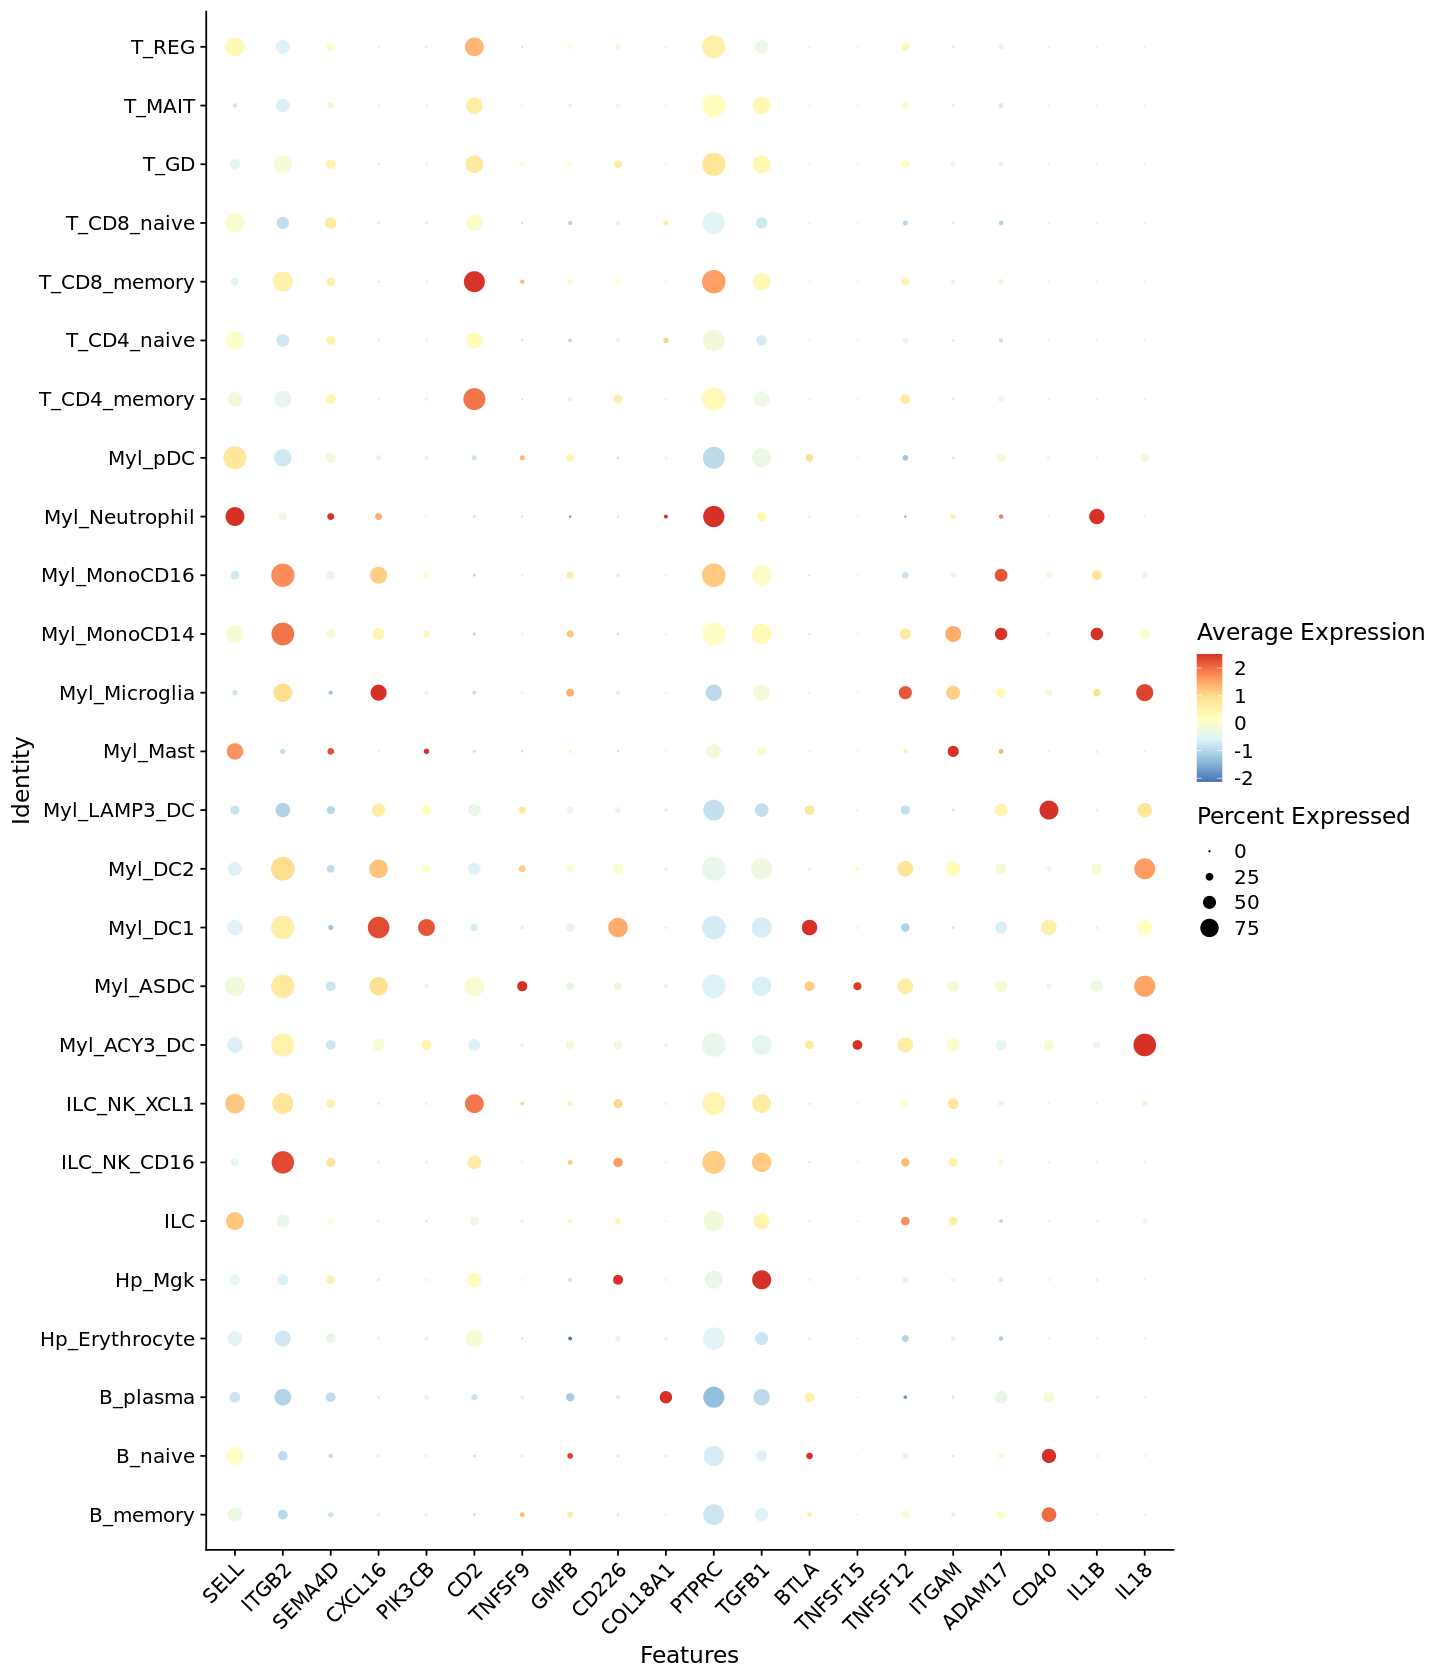

In [29]:
DotPlot(adata, features = nichenet_output$top_ligands %>% rev(), cols = "RdYlBu") + RotatedAxis()
ggsave(file='./v1_figures/SF2A_NicheNet_Dotplot.pdf',width=12,height=14)

In [30]:
fig(15,10)

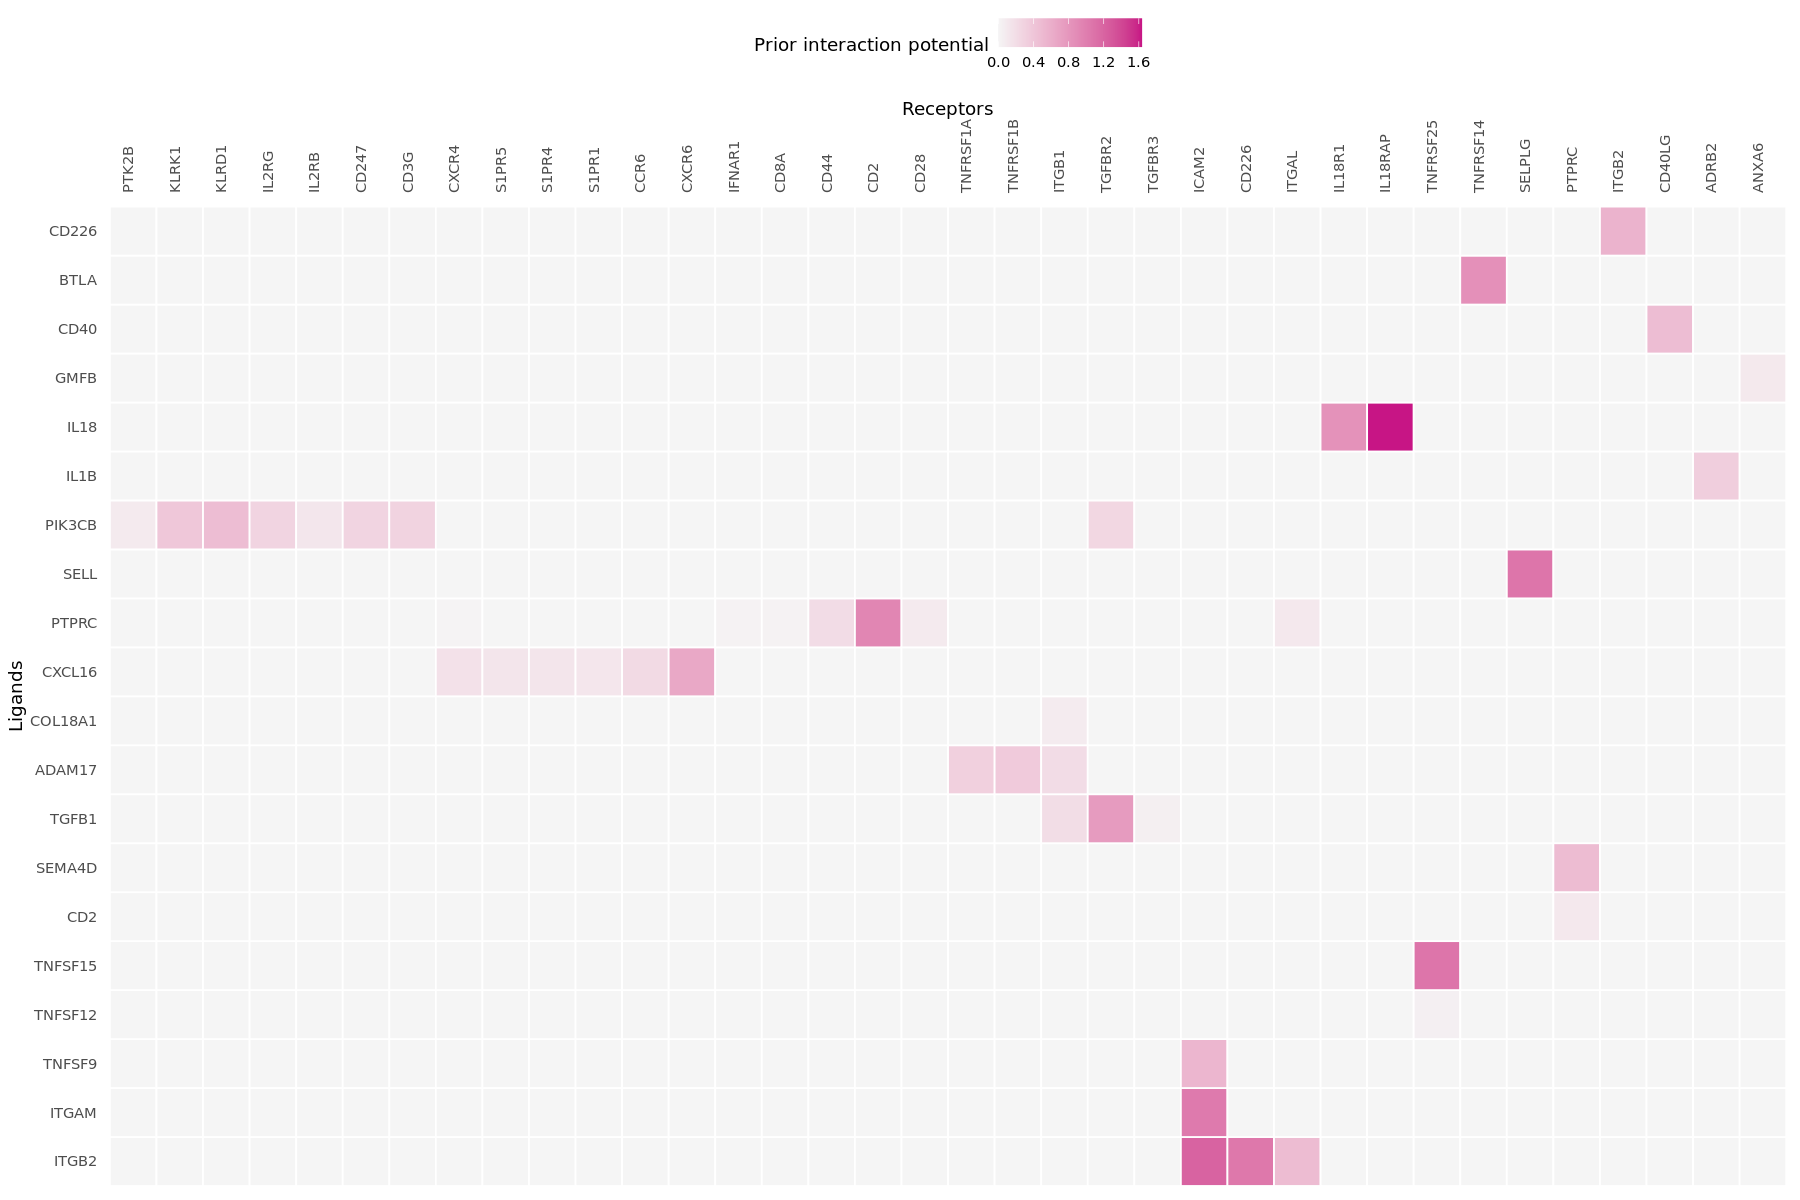

In [31]:
# receiver cell receptors of these top-ranked ligands
nichenet_output$ligand_receptor_heatmap
ggsave(file='./v1_figures/SF2A_NicheNet_RcLigand.pdf',width=15,height=10)